Use a pretrained EDSR (Enhanced Deep Super-Resolution) model from TensorFlow Hub to upscale a low-resolution image to high-resolution.


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
#Load and preprocess an image
def load_and_resize_image(url,scale=4):
    path=tf.keras.utils.get_file(url.split('/')[-1],url)
    img=Image.open(path).convert('RGB')
    hr_img=img.resize((128,128))
    lr_img=hr_img.resize((128//scale,128//scale))
    lr_img=lr_img.resize((128,128))
    return np.array(lr_img)/255.0,np.array(hr_img)/255.0

In [6]:
#load sample image
img_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"
lr_img, hr_img = load_and_resize_image(img_url)

In [7]:
#Prepare low-res image for model input
lr_tensor=tf.convert_to_tensor(lr_img,dtype=tf.float32)[tf.newaxis,...]

In [9]:
#Load EDSR model from Tensorflow Hub
edsr = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")

In [10]:
#Run model to get super-res image
sr_tensor=edsr(lr_tensor)
sr_img=tf.clip_by_value(sr_tensor[0],0.0,1.0).numpy()

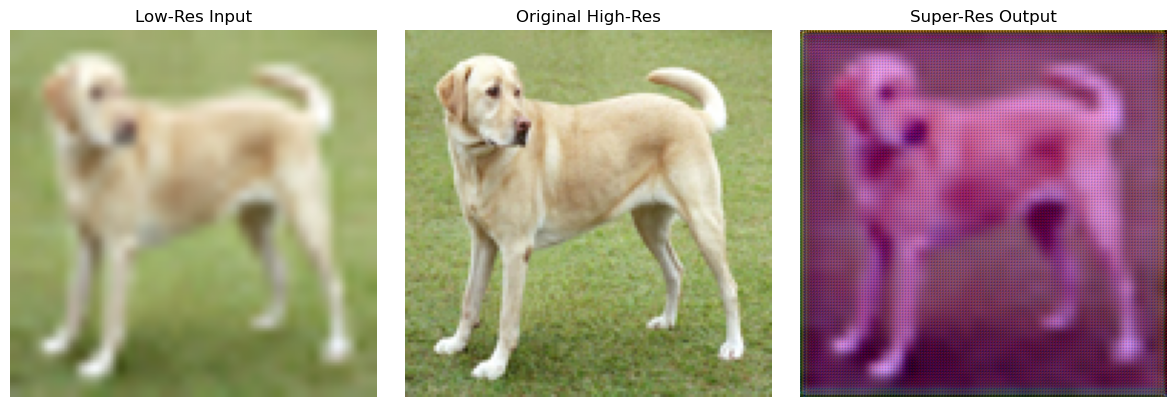

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(lr_img)
plt.title("Low-Res Input")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hr_img)
plt.title("Original High-Res")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sr_img)
plt.title("Super-Res Output")
plt.axis('off')

plt.tight_layout()
plt.show()